###**Algortym genetyczny do rowiązania problemu komiwojażera**

#### Parametry wejściowe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random

In [ ]:
# parametry algorytmu
num_of_ind = 400 # liczba osobników w populacji
num_of_gen = 3000 # liczba generacji (wykonań) algorytmu
k = int(round(0.2*num_of_ind,0)) # ilość osobników losowanych w selekcji
pc = 0.75 # prawdopodobieństwo krzyżowania
pm = 0.6 # prawdopodobieństwo mutacji

#### Wczytanie danych wejściowych i ich przygotowanie

In [ ]:
import numpy as np

In [ ]:
lines = open('/content/drive/MyDrive/PSI_24/GA/miasta280.txt').readlines()

num_of_cities = int(lines[0])
distance_matrix =[[0 for _ in range(num_of_cities)] for _ in range(num_of_cities)]

row = 1
for line in lines[2:]:
  columns = list(map(int, line.strip().split()))
  for col in range(len(columns)):
    distance_matrix[row][col] = columns[col]
    distance_matrix[col][row] = columns[col]
  row += 1
  # print(distance_matrix)

### Funkcje

#### Inicjacja

In [ ]:
def new_individual(m): # m - num_of_cities
  ind = [i for i in range (m)]
  random.shuffle(ind)
  return ind

def new_population(n, m): # n - num_of_ind
  population = []
  for _ in range(n):
    population.append(new_individual(m))
  return population

pop = (new_population(num_of_ind, num_of_cities))
None
#print(pop)

[[217, 260, 5, 11, 90, 66, 166, 30, 265, 262, 230, 62, 58, 122, 181, 50, 261, 24, 116, 18, 78, 124, 263, 215, 201, 72, 56, 208, 219, 6, 27, 204, 226, 164, 232, 22, 107, 182, 209, 94, 150, 225, 221, 157, 82, 12, 100, 8, 51, 167, 153, 227, 121, 45, 140, 218, 147, 38, 93, 191, 39, 269, 184, 213, 132, 239, 13, 174, 2, 222, 210, 205, 183, 196, 125, 200, 136, 60, 114, 138, 98, 33, 0, 234, 29, 236, 47, 71, 159, 123, 59, 233, 61, 64, 185, 274, 74, 88, 75, 111, 67, 110, 264, 180, 169, 63, 189, 278, 240, 168, 97, 128, 15, 190, 105, 84, 108, 126, 31, 223, 44, 242, 23, 113, 255, 118, 26, 203, 235, 271, 152, 7, 101, 144, 40, 83, 179, 244, 37, 172, 171, 220, 243, 216, 202, 272, 151, 46, 142, 69, 257, 32, 130, 28, 79, 231, 194, 135, 106, 197, 25, 175, 270, 148, 165, 70, 68, 156, 158, 16, 143, 99, 120, 53, 162, 112, 21, 141, 102, 137, 1, 245, 131, 177, 81, 266, 253, 238, 252, 91, 155, 193, 267, 35, 149, 276, 139, 212, 211, 199, 43, 55, 275, 279, 254, 207, 273, 41, 229, 96, 119, 250, 17, 146, 20, 251, 

#### Ocena populacji

In [ ]:
def c_distance(cities_order, distance_matrix):
  route = 0
  for i in range(len(cities_order) -1):
    route += distance_matrix[cities_order[i]][cities_order[i+1]]
  route += distance_matrix[cities_order[-1]][cities_order[0]]
  return route                             # całkowita dł. trasy

def fitness(pop, distance_matrix):
  return[c_distance(route, distance_matrix) for route in pop]

fitness_pop = fitness(pop, distance_matrix)
#print(fitness_pop)

[32571, 33349, 33137, 35272, 33906, 35308, 33831, 32711, 34672, 35301, 34086, 35816, 34027, 34054, 34129, 33624, 34708, 35210, 34408, 35625, 33898, 34905, 35036, 35723, 36275, 34263, 34525, 36453, 33780, 33671, 33705, 34132, 36187, 32552, 34587, 35932, 33273, 33272, 33456, 35358, 33047, 33123, 33245, 34544, 34752, 34501, 33224, 33402, 33095, 34233, 33591, 33820, 33678, 34874, 33385, 32539, 33733, 33660, 33688, 33156, 32909, 35591, 33991, 33328, 35798, 33523, 35533, 33197, 33722, 33402, 34358, 34013, 34938, 35680, 34049, 35054, 33596, 33509, 34463, 33585, 34314, 34222, 33132, 34267, 33989, 33072, 34410, 33008, 34424, 32484, 34758, 33747, 33105, 34375, 33729, 33920, 35403, 35601, 35425, 34137, 32135, 35097, 35923, 35327, 34291, 34640, 34037, 36933, 33366, 34706, 35881, 33083, 33726, 33814, 36164, 33502, 34734, 34951, 35299, 33460, 33466, 34062, 32863, 34830, 32476, 34169, 33238, 34552, 33778, 33735, 33908, 33345, 34154, 33294, 32284, 35547, 34496, 33324, 33774, 33430, 33240, 34687, 34219

#### Selekcja turniejowa

In [ ]:
def selection(pop, fitness_values, k):
  new_pop = []
  for _ in range(len(pop)):
    competition = random.sample(range(len(pop)), k)
    best_index = min(competition, key = lambda idx: fitness_values[idx])
    new_pop.append(pop[best_index])
  return new_pop               # nowa populacja po turnieju na podstawie ocen

def pop_selection(pop, distance_matrix, k):
  fitness_values = fitness(pop, distance_matrix)
  return selection(pop, fitness_values, k)

selection_pop = pop_selection(pop, distance_matrix, k)
#print(selection_pop)

# dynamiczna liczba osobników w selekcji
def adaptive_selection_size(gen, num_of_gen,min_size=2, max_size=10):
  return int(min_size + (max_size - min_size) * (gen / num_of_gen))

[[105, 164, 134, 270, 252, 278, 236, 205, 140, 22, 21, 261, 228, 33, 116, 156, 166, 191, 262, 148, 51, 87, 272, 154, 276, 43, 108, 88, 27, 44, 73, 129, 184, 54, 52, 130, 53, 175, 69, 85, 35, 197, 269, 133, 192, 176, 23, 39, 208, 246, 199, 226, 67, 217, 251, 162, 189, 202, 279, 183, 198, 149, 94, 171, 46, 135, 37, 113, 8, 244, 245, 225, 165, 181, 0, 45, 9, 36, 249, 239, 258, 104, 151, 14, 26, 111, 6, 221, 91, 218, 118, 260, 41, 266, 136, 76, 124, 82, 32, 177, 83, 187, 13, 90, 215, 190, 216, 126, 47, 30, 195, 159, 138, 234, 242, 160, 139, 142, 50, 207, 93, 194, 125, 232, 259, 169, 161, 214, 268, 264, 28, 203, 29, 100, 99, 71, 211, 277, 144, 10, 34, 241, 1, 18, 15, 223, 20, 250, 131, 227, 235, 237, 48, 222, 80, 152, 121, 70, 42, 25, 58, 49, 254, 63, 128, 65, 257, 255, 109, 180, 107, 158, 275, 68, 247, 114, 256, 16, 84, 57, 178, 163, 143, 204, 120, 271, 145, 179, 55, 2, 7, 265, 173, 174, 86, 231, 238, 147, 153, 17, 11, 101, 60, 106, 196, 253, 19, 24, 168, 122, 74, 112, 102, 81, 117, 61, 72

#### Krzyżowanie

In [ ]:
def crossover(pop, pc):
    cross_population = []
    for i in range(0,len(pop),2):
        par1 = pop[i]
        par2 = pop[i+1]

        if random.random()<pc:
            #c1,c2 = PMX(par1,par2)
            c1 = order_crossover(par1, par2)  # podmiana na
            c2 = order_crossover(par2, par1)  # krzyżowanie OX
            cross_population.append(c1)
            cross_population.append(c2)
        else:
            cross_population.append(par1[:])
            cross_population.append(par2[:])
    return cross_population

# def order(par, mid, new_mid): # rodzic, środek, nowy środek
#   order = []
#   for g in par:
#     while g in mid:
#       g = new_mid[mid.index(g)]
#     order.append(g)
#   return order

# def PMX(par1, par2):
#   c1 = random.randint(1, len(par1)-2)
#   c2 = random.randint(c1+1, len(par1)-1)
#   ch1 = par1[c1:c2]
#   ch2 = par2[c1:c2]

#   first1 = order(par2[:c1], ch1, ch2)
#   first2 = order(par1[:c1], ch2, ch1)
#   second1 = order(par2[c2:], ch1, ch2)
#   second2 = order(par1[c2:], ch2, ch1)

#   ch1 = first1 + ch1 + second1
#   ch2 = first2 + ch2 + second2
#   return ch1, ch2

def order_crossover(par1, par2):
    start, end = sorted(random.sample(range(len(par1)), 2))  # losowy przedział
    child = [-1] * len(par1)  # puste dziecko
    child[start:end + 1] = par1[start:end + 1]  # kopiowanie segmentu z pierwszego rodzica

    pointer = 0  # wskaźnik do wstawiania genów z drugiego rodzica
    for gene in par2:
        if gene not in child:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = gene  # wstawianie genów w odpowiedniej kolejności
    return child

#### Mutacja

In [ ]:
def mutation(pop, pm):
  for i in range(len(pop)):
    if random.random()<pm:
      mutation_inv(pop[i])

def mutation_inv(ind):
  c1 = random.randint(1, len(ind))
  c2 = random.randint(1, len(ind))
  while c1 == c2:
    c2 = random.randint(1, len(ind))
  if c1 > c2:
    c1, c2 = c2, c1

  ind[c1:c2] = ind[c2-1:c1-1:-1]
  return ind

#### Elitarność



In [ ]:
# dynamiczne elity, aby najlepsze rozwiązanie z każdej generacji było automatycznie przenoszone do kolejnej generacji
def dynamic_elites(pop, fitness_values, stagnation_counter, max_stagnation, num_of_ind):
    base_percentage = 0.02 # 2% populacji jako elity
    max_percentage = 0.5 # max 50% populacji przy stagnacji

    # dynamiczna zmiana liczby elit w zależności od stagnacji
    stagnation_ratio = stagnation_counter / max_stagnation  # od 0 do 1
    dynamic_percentage = base_percentage + (max_percentage - base_percentage) * stagnation_ratio

    # obliczenie liczby elit
    num_of_elites = max(2, int(dynamic_percentage * num_of_ind))

    # sortowanie populacji według fitness (od najlepszych)
    sorted_pop = [x for _, x in sorted(zip(fitness_values, pop), key=lambda pair: pair[0])]  # minimalizacja

    return sorted_pop[:num_of_elites]  # zwrócenie najlepszych osobników

####  Optymalizacja lokalna

In [ ]:
# optymalizacja do poprawy jakości rozwiązań
def two_opt(route, distance_matrix, max_iterations):
    best_distance = c_distance(route, distance_matrix)
    count = 0
    for i in range(1, len(route) - 2):
        for j in range(i + 1, len(route)):
            if count >= max_iterations:
                return route
            new_route = route[:]
            new_route[i:j] = reversed(route[i:j])  # odwrócenie segmentu
            new_distance = c_distance(new_route, distance_matrix)
            if new_distance < best_distance:
                route = new_route
                best_distance = new_distance
                count += 1
    return route  # brak lepszej trasy

### Rozwiązanie

#### Zaaplikowanie schematu działania GA z wykorzystaniem zdefiniowanych wyżej funkcji

In [ ]:
# zapis wyników do pliku wyniki_ga.txt
with open('/content/drive/MyDrive/PSI_24/GA/wyniki_ga.txt', 'a') as f:

  # populacja początkowa
  pop_P = new_population(num_of_ind, num_of_cities)

  # ocena populacji
  fitness = [c_distance(ind, distance_matrix) for ind in pop_P]

  # nowy osobnik - na ten moment najlepszy
  min_ind = (pop_P[0][:], fitness[0])

  for i in range(1, len(pop_P)):
    if fitness[i] < min_ind[1]:
      min_ind = (pop_P[i][:], fitness[i])

  # parametry kryteriów stopu
  target_distance = 2500   # docelowa wartość funkcji celu
  max_stagnation = 300     # maksymalna liczba generacji bez poprawy
  stagnation_counter = 0   # licznik stagnacji

  # początkowe i końcowe wartości p-stwa mutacji
  initial_pm = pm
  final_pm = 0.2

  print(f'Parametry algorytmu:\nliczba osobników: {num_of_ind}, liczba generacji: {num_of_gen}, p-stwo krzyżowania: {pc}, p-stwo mutacji: {pm}', file = f)
  print(f'Najlepszy osobnik w losowej populacji: {min_ind[1]}')

  all_min = [min_ind[1]]

  # pętla GA
  for gen in range(num_of_gen):

    # dynamiczne p-stwo mutacji
    pm = initial_pm - (gen/num_of_gen)*(initial_pm - final_pm)*(1.5)

    # dynamiczna liczba elit
    elites = dynamic_elites(pop_P, fitness, stagnation_counter, max_stagnation, num_of_ind // 2)

    # dynamiczna wielkość selekcji
    if gen < num_of_gen // 2:
      k = adaptive_selection_size(gen, num_of_gen)  # niska presja na początku
    else:
      k = adaptive_selection_size(gen, num_of_gen) * 1.5  # wzrost presji w końcowych generacjach

    # selekcja z presją
    pop_T = selection(pop_P, fitness, int(k))

    # krzyzowanie
    pop_C = crossover(pop_T, pc)

    # mutacja
    mutation(pop_C, pm)

    # uzupełnienie populacji o elity (elity na początku)
    pop_C[:len(elites)] = elites

    # ograniczona optymalizacja lokalna dla elit (co 50 generacji, dynamicznie dostosowana)
    if  gen % 50 == 0:
      if stagnation_counter > (max_stagnation // 2):
        max_iterations = 300 # liczba iteracji przy dłuższej stagnacji
        top_n = int(0.3 * len(pop_C))
      else:
        max_iterations = 50
        top_n = int(0.1 * len(pop_C))

      unique_elites = list(set(tuple(ind) for ind in pop_C[:top_n])) # usuwanie duplikatów

      for i in range(len(unique_elites)):
        pop_C[i] = two_opt(list(unique_elites[i]), distance_matrix, max_iterations)

    # ocena nowej populacji z elitami
    fitness_C = [c_distance(ind, distance_matrix) for ind in pop_C]
    best_fitness = min(fitness_C)

    # sprawdzenie poprawy najlepszego wyniku
    if best_fitness < min_ind[1]:
        min_ind = (pop_C[fitness_C.index(best_fitness)][:], best_fitness)
        stagnation_counter = 0  # reset licznika stagnacji
    else:
        stagnation_counter += 1

    # kryterium stopu - osiągnięcie docelowej wartości
    if min_ind[1] <= target_distance:
        print(f'Osiągnięto docelowy wynik {target_distance} km po {gen} generacjach.',  file = f)
        break

    # kryterium stopu - brak poprawy przez określoną liczbę generacji
    if stagnation_counter >= max_stagnation:
        print(f'Algorytm zatrzymany po {gen} generacjach z powodu stagnacji.', file = f)
        break

    # aktualizacja populacji po zakończeniu iteracji
    pop_P = pop_C[:]
    fitness = fitness_C[:]

    # restartowanie 30% najgorszej populacji po 800 generacjach bez poprawy
    if stagnation_counter >= 800:
      worst_30_percent = int(0.3 * len(pop_P))
      sorted_indices = sorted(range(len(fitness)), key=lambda i: fitness[i], reverse=True)
      for i in range(worst_30_percent):
          pop_P[sorted_indices[i]] = new_population(1, num_of_cities)[0]  # podmiana najgorszych osobników
      fitness = [c_distance(ind, distance_matrix) for ind in pop_P]
      stagnation_counter = 0  # reset stagnacji po restarcie
      print(f'Populacja została zrestartowana po {gen} generacjach stagnacji.', file=f)

    if gen %100 == 0:
      print(f'Najlepszy osobnik po {gen} generacjach: {min_ind[1]}')

    all_min.append(min_ind[1])

  print(f'Najlepszy osobnik po {num_of_gen} generacjach: {min_ind[1]}')
  print(f'Najlepszy osobnik po {num_of_gen} generacjach: {min_ind[1]}', file = f)
  print(f'Kolejność miast dla najlepszego osobnika: {min_ind[0]}\n', file = f)

Najlepszy osobnik w losowej populacji: 31114
Najlepszy osobnik po 0 generacjach: 26981
Najlepszy osobnik po 100 generacjach: 17324
Najlepszy osobnik po 200 generacjach: 14386
Najlepszy osobnik po 300 generacjach: 11688
Najlepszy osobnik po 400 generacjach: 8912
Najlepszy osobnik po 500 generacjach: 6053
Najlepszy osobnik po 600 generacjach: 4504
Najlepszy osobnik po 700 generacjach: 3218
Najlepszy osobnik po 800 generacjach: 2896
Najlepszy osobnik po 900 generacjach: 2896
Najlepszy osobnik po 1000 generacjach: 2890
Najlepszy osobnik po 1100 generacjach: 2883
Najlepszy osobnik po 1200 generacjach: 2883
Najlepszy osobnik po 1300 generacjach: 2883
Najlepszy osobnik po 3000 generacjach: 2883


#### Wykres zależności liczby generacji od najkrótszego dystansu w każdej z generacji

In [ ]:
import matplotlib.pyplot as plt

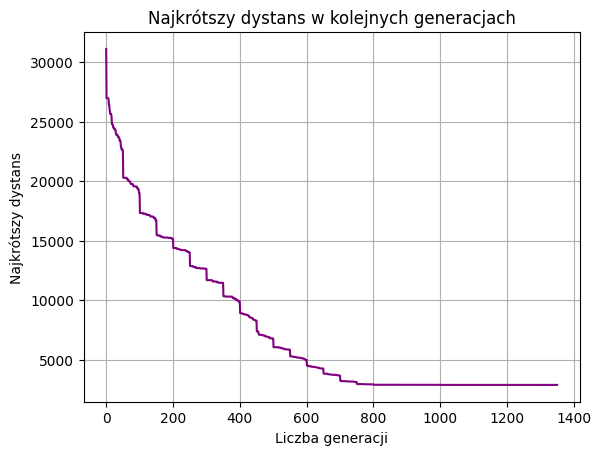

In [ ]:
ox = range(len(all_min))
oy = all_min
plt.plot(ox,oy,color = 'purple')
plt.linestyle = 'solid'
plt.grid(True)
plt.title('Najkrótszy dystans w kolejnych generacjach')
plt.xlabel('Liczba generacji')
plt.ylabel('Najkrótszy dystans')
plt.show()